# SMU 7331 Data Mining Project 1
##### Authors: Shon Mohsin, Heber Nielsen, Jose Torres, Lokesh Maganti

In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('ggplot')

### Introduction to Data:

This paper is an evaluation of the dataset used in the research article _["Effects of earthquake on perinatal outcomes: A Chilean register-based study"](https://github.com/ShonTM/DataMiningProject1/blob/master/chile%20earthquake%20plos%20one%20paper.pdf)_  by Yasna K, et al. The paper looks for the effect of the February 27, 2010 earthquake that occured in Chile and the perinatal outcomes of Chilean pregnant women to determine if there was an effect of the earthquake on the outcomes. 

For this project, we visualize the dataset used and use exploratory data analysis to identify cursory meaning from the visualizations. We create summary statistics to derive high-level opportunities for further analysis. 

| Feature Name (Original)       | Feature Name (English) | Description               | Variable Type                |
| ------------- |:-------------:| ----------------------:|--------------------------:|-----------------------------:|
| id_clinica                    | Clinic_ID              | ID# of the medical clinic | numeric                      |
| id_excel                      | Excel_File_ID          | ID# in original source    |                              |
| dia                           | Day                    | Day in birth month        | numeric                      |
| mes                           | Month                  | Birth month               | numeric                      |
| ano                           | Year                   | Birth year                | numeric                      |
| sex                           | Sex                    | Birth sex (Mujer/Hombre)  | numeric                      |
| peso                          | Weight                 | Birth weight in grams| numeric                           |
| talla                         | Length                 | Birth length in cm        | numeric                      |
| cc                            | Head_circ              | Head circumference in cm (eyebrow level) | numeric       |
| apgar                         | Apgar_1                | Apgar score 1 minute after birth | numeric               |
| apgar5                        | Apgar_5                | Apgar score 5 minutes after birth | numeric              |
| comuna                        | Municipality           | Avg. annual income in Chilean Pesos | numeric            |
| aeg                           | wgt_for_age            | Weight relative to gestational age | Categorical         |
| eg                            | Gest_age               | Gestational age at birth in weeks  | numeric             |
| trim_exp                      | Trimester              | Trimester when exposure occurred   | numeric             |
| bajo_peso                     | Low_bthwgt             | Indicator for weight under 2500 grams | Categorical      |
| pretermino                    | Premature              | Indicator for gestation period less than 37 weeks | Categorical  |
| edad_mama                     | Maternal_Age           | Age of mother in years    | numeric                      |
| paridad                       | Parity                 | Number of previous live births by same mother | numeric  |
| trim_exp_g                    | Trim_study             | Trimester of the control or exposure year (1-6)   | Categorical |
| pi                            | Pondural Index         | Score representing fetal growth | numeric                |
| exposed                       | Exposed                | Indicator of stress exposure that occurred during earthquake  | Categorical |

### Data Collection and Cleaning:

In [62]:
url = 'https://raw.githubusercontent.com/ShonTM/DataMiningProject1/master/Chilean%20Earthquake%20Perinatal%20Outcome_english_translation.csv' 
df=pd.read_csv(url)
df.head()


,Clinic_ID,Excel_File_ID,Day,Month,Year,Sex,Weight,Length,Head_circ,Apgar_1,...,wgt_for_age,Gest_age,Trimester,Low_birthwgt,Premature,Maternal_age,Parity,Trim_study,Ponderal_index,Exposed
0,NaN,4714,27,8,2009,female,3285,48.5,34.5,9,...,aeg,40,Second,normal birthweight,Not premature,19,0.0,Second2009,2.879454,0
1,NaN,2954,28,5,2009,male,2730,49.0,34.0,9,...,Peg,40,Third,normal birthweight,Not premature,32,0.0,Third2009,2.320462,0
2,NaN,1154,27,2,2009,male,2840,47.0,35.0,8,...,aeg,37,Third,normal birthweight,Not premature,18,0.0,Third2009,2.735425,0
3,NaN,1781,30,3,2009,female,3255,50.0,35.5,9,...,aeg,40,Third,normal birthweight,Not premature,19,0.0,Third2009,2.604000,0
4,NaN,2654,13,5,2009,male,3665,52.0,36.0,9,...,aeg,40,Third,normal birthweight,Not premature,25,0.0,Third2009,2.606537,0


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4076 entries, 0 to 4075
Data columns (total 22 columns):
Clinic_ID         239 non-null float64
Excel_File_ID     4076 non-null int64
Day               4076 non-null int64
Month             4076 non-null int64
Year              4076 non-null int64
Sex               4076 non-null object
Weight            4076 non-null int64
Length            4076 non-null float64
Head_circ         4076 non-null float64
Apgar_1           4076 non-null int64
Apgar_5           4076 non-null int64
Municipality      4076 non-null object
wgt_for_age       4076 non-null object
Gest_age          4076 non-null int64
Trimester         4076 non-null object
Low_birthwgt      4076 non-null object
Premature         4076 non-null object
Maternal_age      4076 non-null int64
Parity            4074 non-null float64
Trim_study        4076 non-null object
Ponderal_index    4076 non-null float64
Exposed           4076 non-null int64
dtypes: float64(5), int64(10), object(7)


#### Data Quality:

The following description of the data gathering process is from the paper describing the data quality:

All demographic and clinical information was abstracted and recorded by professional workers (medical doctors, midwives, and nurses). The data abstracted included: date of delivery, gestational age at delivery (in weeks), maternal age (in years), parity of mother, the location of residence, the gender of newborns, birth weight (in grams), length (in centimeters), head circumference (in centimeters), Apgar at 5 minutes, and small for gestational age (SGA) (defined as newborn birth weight <10th percentile for gestational age). Perinatal outcomes measured included: birth weight, length, ponderal index (weight/height3), head circumference, Apgar at 5 minutes, the proportion of SGA newborns, preterm delivery (birth between 34–37 weeks). Gender of newborns, location of residence, gestational age (either in weeks or days), parity and maternal age were considered as effect modifiers; location of residence was related to three categories of average annual income: low income (500,000 to 1 million Chilean pesos), middle income (1 to 1.5 million Chilean pesos) and high income (more than 1.5 million Chilean pesos).  

#### Missing Values (this needs to be updated):
There are no missing values except the Clinic_ID column. We drop this column as the value is not used for any analysis. 

In [64]:
#drop "Clinic_ID" and "Excel_File_ID" from dataframe
if 'Clinic_ID' in df:
    del df['Clinic_ID'] 
if 'Excel_File_ID' in df:
    del df['Excel_File_ID']

#### Outliers:
We see a few outliers from the scatterplots. Notable outliers are:
<br>Weight VS length
<br>Weight VS Head_circ
<br>Length VS Head_circ
<br>Ponderal_index VS Weight
<br>Ponderal_index VS Length
<br>Ponderal_index VS Head_circ
<br>Ponderal_index VS Maternal_age

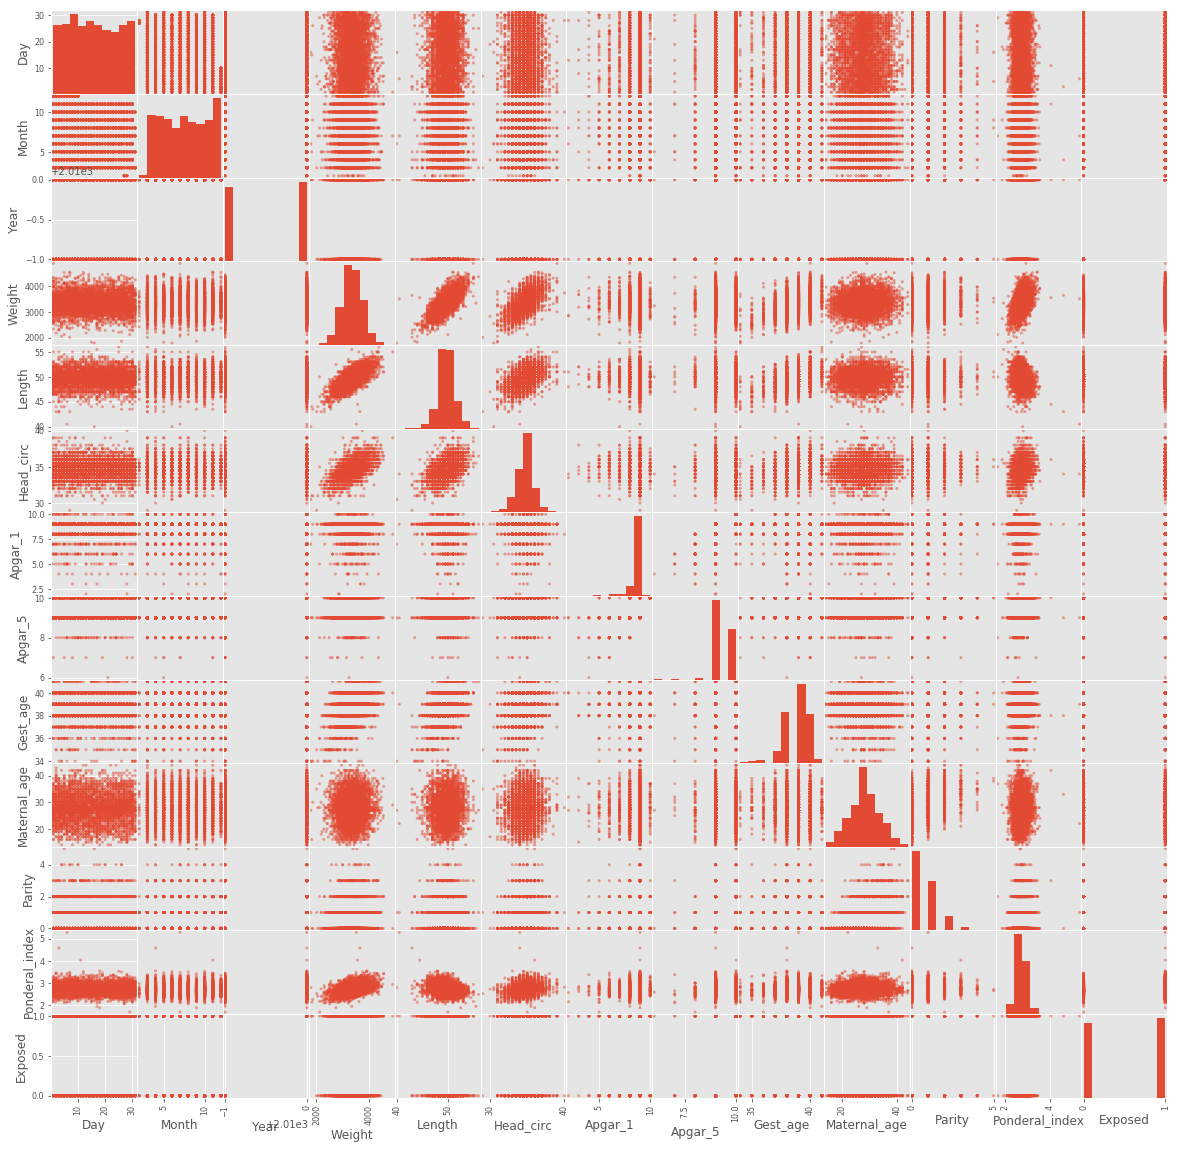

In [65]:
# Identify outliers from Scatterplot matrix
from pandas.plotting import scatter_matrix

ax = scatter_matrix(df,figsize=(20, 20))

#### Duplicate Data:
No duplicate data are included in the dataset. 

### Data Preparation

The columns are converted to their english values as described in the Data Overview section. The conversion is done directly to the csv file using excel and find and replace functions for the class variables. 

#### Statistical Visualization

We divide our buckets by the binary 'Exposed' column to see if there are visually discernable features that are evident between infants that were born before the earthquake or after the earthquake. 

Subset Selection for visualization:
<br>Sex
<br>Maternal_age
<br>Municipality
<br>Gest_age
<br>Trimester
<br>Low_birthwgt
<br>Parity
<br>Apgar_5
<br>Premature
<br>Ponderal_Index



Visualize appropriate statistics (e.g., range, mode, mean, median, variance, counts) for a subset of attributes. Describe anything meaningful you found from this or if you found something potentially interesting.

In [35]:
df.describe()

,Day,Month,Year,Weight,Length,Head_circ,Apgar_1,Apgar_5,Gest_age,Maternal_age,Parity,Ponderal_index,Exposed
count,4076.000000,4076.000000,4076.000000,4076.000000,4076.000000,4076.000000,4076.000000,4076.000000,4076.000000,4076.000000,4074.000000,4076.000000,4076.000000
mean,15.374141,7.113837,2009.517664,3355.048086,49.696516,34.689463,8.767664,9.363837,38.802993,27.839794,0.611438,2.729498,0.517664
std,8.736868,2.762731,0.499749,384.896728,1.723517,1.187216,0.730237,0.521778,1.074730,5.380683,0.782184,0.228661,0.499749
min,1.000000,2.000000,2009.000000,1790.000000,40.000000,29.000000,2.000000,6.000000,34.000000,14.000000,0.000000,1.696000,0.000000
25%,8.000000,5.000000,2009.000000,3098.750000,48.500000,34.000000,9.000000,9.000000,38.000000,24.000000,0.000000,2.579992,0.000000
50%,15.000000,7.000000,2010.000000,3345.000000,50.000000,35.000000,9.000000,9.000000,39.000000,28.000000,0.000000,2.717342,1.000000
75%,23.000000,10.000000,2010.000000,3610.000000,51.000000,35.500000,9.000000,10.000000,40.000000,31.000000,1.000000,2.866328,1.000000
max,31.000000,12.000000,2010.000000,4890.000000,56.000000,40.000000,10.000000,10.000000,41.000000,44.000000,5.000000,5.283747,1.000000


We can see based on the dataframe description above that there are two missing values for `Parity`.  (Impute?)

In [298]:
#identify records with missing values
df.iloc[df['Parity'].isna().get_values(),:]

,Day,Month,Year,Sex,Weight,Length,Head_circ,Apgar_1,Apgar_5,Municipality,wgt_for_age,Gest_age,Trimester,Low_birthwgt,Premature,Maternal_age,Parity,Trim_study,Ponderal_index,Exposed
596,23,9,2009,male,4065,51.0,36.0,9,10,1mill-1.5mill,aeg,40,First,normal birthweight,Not premature,33,NaN,First2009,3.064432,0
3735,13,5,2010,male,3045,48.0,34.5,9,9,500-1mill,aeg,39,Third,normal birthweight,Not premature,27,NaN,Third2010,2.753364,1


In [66]:
#rename legnth column
df.rename(columns={'Lenght': 'Length'}, inplace=True)

In [67]:
#get list of categorical variables
categories = list(df.columns[df.dtypes == 'object']) + ['Parity', 'Exposed']

In [68]:
#change data type for categorical variables to pandas 'category' type
df[categories] = df[categories].astype('category')

In [69]:
#mean values of target variables grouped by exposure to earthquake
summary_df = df.groupby(by='Exposed').agg(np.mean).drop(['Day', 'Month', 'Year'], axis=1).transpose()
summary_df.columns = ['Not Exposed', 'Exposed']
summary_df

,Not Exposed,Exposed
Weight,3358.002035,3352.295735
Length,49.894354,49.512180
Head_circ,34.752238,34.630972
Apgar_1,8.727365,8.805213
Apgar_5,9.280264,9.441706
Gest_age,38.822482,38.784834
Maternal_age,27.573245,28.088152
Ponderal_index,2.698254,2.758609


When we look at the distribution of newborns for each category in `Sex`, `Wealth`, `Trimester`, and `Parity`, we see the non-exposed (red) and exposed (blue) classes are balanced across all categories of all variables.  That is to say the proportion of exposed newborns in a particular category (e.g. Sex-Female) is similar to the proportion of non-exposed newborns.

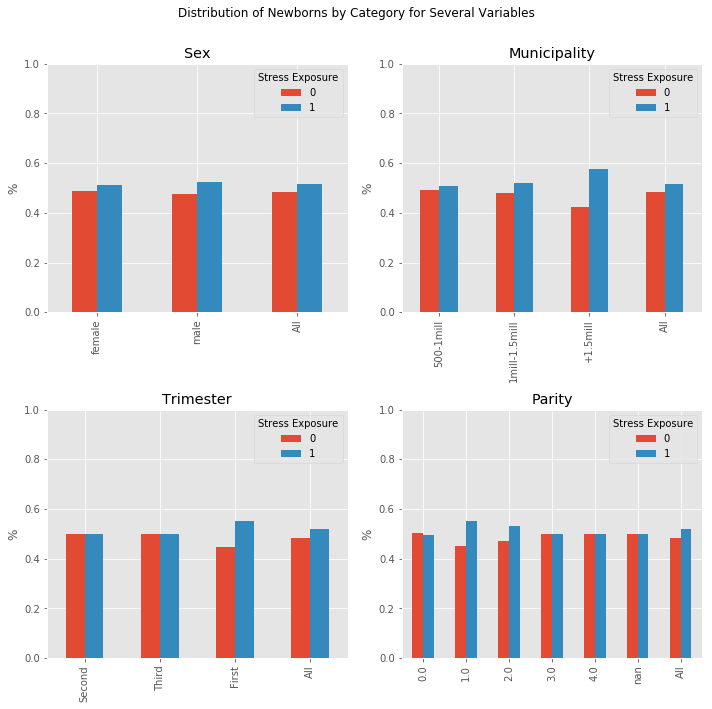

In [304]:
#create 4 subplots
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
plt.suptitle('Distribution of Newborns by Category for Several Variables')

#plot each cross tabulation (% is relative to total newborns in a variable category)
independent_features = ['Sex', 'Municipality', 'Trimester', 'Parity']
for idx in range(len(independent_features)):
    row = int(idx / 2)
    col = int(idx % 2)
    pd.crosstab(index=df[independent_features[idx]],columns=df['Exposed'],
                colnames=['Stress Exposure'], margins=True, normalize='index') \
                .plot(kind='bar', ylim=(0,1.0), ax=ax[row,col])
    ax[row,col].set_ylabel('%')
    ax[row,col].set_title(independent_features[idx])
    ax[row,col].set_xlabel('')

#adjust tight_layout to avoid title clipping
fig.tight_layout(rect=[0, 0, 1, .94])

plt.show()

We can see in the next table that the distribution of newborns by exposure class is also balanced across the same categorical variables.  That is to say that the proportion of exposed newborns for a categorical variable (e.g. Sex) is roughly the same for all categories of that variable.  The same holds true for non-exposed newborns.

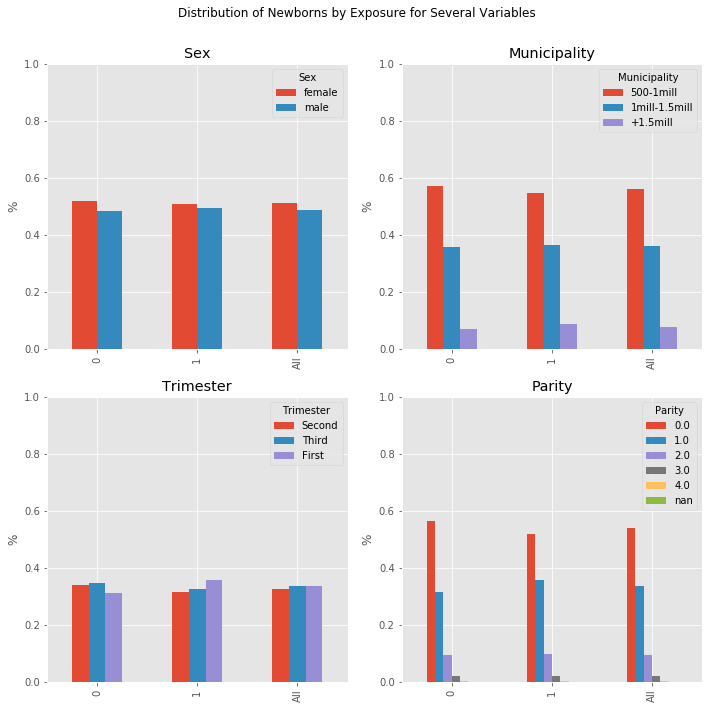

In [311]:
#create 4 subplots
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
plt.suptitle('Distribution of Newborns by Exposure for Several Variables')

#plot each cross tabulation (% is relative to total newborns in a Stress category)
independent_features = ['Sex', 'Municipality', 'Trimester', 'Parity']
for idx in range(len(independent_features)):
    row = int(idx / 2)
    col = int(idx % 2)
    pd.crosstab(index=df[independent_features[idx]],columns=df['Exposed'],
                colnames=['Stress Exposure'], margins=True, normalize='columns').transpose() \
                .plot(kind='bar', ylim=(0,1.0), ax=ax[row,col])
    ax[row,col].set_ylabel('%')
    ax[row,col].set_title(independent_features[idx])
    ax[row,col].set_xlabel('')

#adjust tight_layout to avoid title clipping
fig.tight_layout(rect=[0, 0, 1, .94])

plt.show()

Visualize the most interesting attributes (at least 5 attributes, your opinion on what is interesting). Important: Interpret the implications for each visualization. Explain for each attribute why the chosen visualization is appropriate.

Visualize relationships between attributes: Look at the attributes via scatter plots, correlation, cross-tabulation, group-wise averages, etc. as appropriate. Explain any interesting relationships.

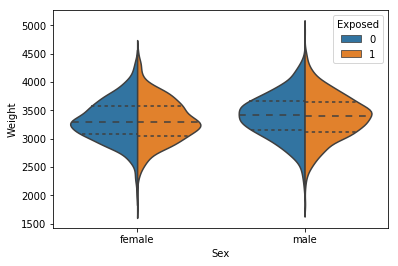

In [30]:
sns.violinplot(x='Sex', y='Weight', hue='Exposed', data=df, 
                   split=True, inner="quart")

 Identify and explain interesting relationships between features and the class you are trying to predict (i.e., relationships with variables and the target classiﬁcation).

Are there other features that could be added to the data or created from existing features?  Which ones?

### Modeling 

### Evaluation

### Deployment